In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import sklearn.preprocessing
import sklearn.impute
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer
import seaborn as sns

In [5]:
iris_df = data('iris')

In [6]:
iris_df.head(4)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa


In [7]:
iris_df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [20]:
iris_df.columns.tolist()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [15]:
iris_df.columns = iris_df.columns.str.replace('.', '_').str.lower()

In [12]:
iris_df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
           dtype='int64', length=150)

In [17]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [33]:
def iris_encoder(train):
    encoder = sklearn.preprocessing.OneHotEncoder(sparse = False)
    encoder.fit(train[['species']])
    m = encoder.transform(train[['species']])
    cols = ['species_' + c for c in encoder.categories_[0]]
    train = pd.concat([train, pd.DataFrame(m, index = train.index, columns = cols)], axis = 1).drop(columns = 'species')
    return train
    

In [34]:
iris_encoder(iris_df)

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
1,5.1,3.5,1.4,0.2,1.0,0.0,0.0
2,4.9,3.0,1.4,0.2,1.0,0.0,0.0
3,4.7,3.2,1.3,0.2,1.0,0.0,0.0
4,4.6,3.1,1.5,0.2,1.0,0.0,0.0
5,5.0,3.6,1.4,0.2,1.0,0.0,0.0
6,5.4,3.9,1.7,0.4,1.0,0.0,0.0
7,4.6,3.4,1.4,0.3,1.0,0.0,0.0
8,5.0,3.4,1.5,0.2,1.0,0.0,0.0
9,4.4,2.9,1.4,0.2,1.0,0.0,0.0
10,4.9,3.1,1.5,0.1,1.0,0.0,0.0


In [40]:
 def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [42]:
def get_titanic_data():
    query = """
    SELECT *
    FROM passengers
    """
    df = pd.read_sql(query, get_db_url('titanic_db'))
    return df

In [43]:
df = get_titanic_data()

In [44]:
df.head(4)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0


In [45]:
# Handle the missing values in the embark_town and embarked columns.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [53]:
df.embark_town.mode()[0]

'Southampton'

In [56]:
df.embark_town = df.embark_town.fillna(df.embark_town.mode()[0])
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      891 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   891 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [58]:
df = df.drop(columns = 'deck')

In [60]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1


In [ ]:
# Use a label encoder to transform the embarked column
encoder1 = LabelEncoder()
encoder1.fit(df[['embarked']])
m = encoder1.transform(df[['embarked']])
col_name = 'embarked

In [76]:
# Use a label encoder to transform the embarked column
encoder1 = LabelEncoder()
encoder1.fit(df[['embarked']])
df['encoded_embarked'] = encoder1.transform(df[['embarked']])


In [78]:
df.head(4)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,encoded_embarked
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,2
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,2


In [79]:
# Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?
scaler = MinMaxScaler()

In [80]:
col_list = ['age', 'fare']
column_list_scaled = [col + '_scaled' for col in col_list]

In [83]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[col_list]), columns = column_list_scaled, index = df.index)

In [84]:
df = df.join(df_scaled)

In [87]:
df.head(4)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,encoded_embarked,age_scaled,fare_scaled
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0.472229,0.139136
2,2,1,3,female,26.0,0,0,7.9250,S,Third,Southampton,1,2,0.321438,0.015469
3,3,1,1,female,35.0,1,0,53.1000,S,First,Southampton,0,2,0.434531,0.103644


In [89]:
def impute(train, my_strategy, column_list):
    imputer = SimpleImputer(strategy=my_strategy)
    train[column_list] = imputer.fit_transform(train[column_list])
    return train

In [97]:
df = impute(df, 'mean', ['age', 'fare'])

In [98]:
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,encoded_embarked,age_scaled,fare_scaled
0,0,0,3,male,22.0,1,0,7.2500,S,Third,Southampton,0,2,0.271174,0.014151
1,1,1,1,female,38.0,1,0,71.2833,C,First,Cherbourg,0,0,0.472229,0.139136


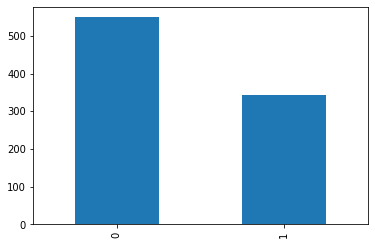

In [101]:
df.survived.value_counts().plot.bar()

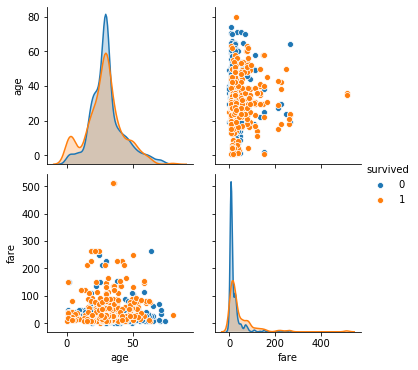

In [108]:
sns.pairplot(df[['age', 'fare', 'survived']],hue = 'survived')